# Analyse the difference between the different variations we have until now

- Simple matching 
- Simple matching when handling data issues
- Simple matching when handling data issues with correction factor
- Simple matching when handling data issues with correction factor and seasonality

In [1]:
from pathlib import Path
from energyclustering.webapp.resultparser import ResultParser, ResultComparison
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
SIMPLE = 'random_profiles_v1'
SIMPLE_DATA = 'random_profiles_no_data_issues_v1'
CORR = 'develop_random_profiles_correction_v1'
SEASON = 'develop_random_profiles_seasonality_v1'
# FULL_SEASON = 'random_profiles_seasonality_v1'
directory = Path('/cw/dtaiproj/ml/2020-FLAIR-VITO/profile-clustering/distance_matrices/')
assert directory.exists()
assert (directory/SIMPLE).exists()
assert (directory/SIMPLE_DATA).exists()
assert (directory/CORR).exists()
assert (directory/SEASON).exists()
# assert (directory/FULL_SEASON).exists()
assert all((directory/name).exists() for name in [SIMPLE, SIMPLE_DATA, CORR, SEASON])

# Look if the correction makes any difference

In [4]:
df1 = pd.read_pickle(directory/SIMPLE_DATA/'full_distance_matrix.pkl')
df2 = pd.read_pickle(directory/CORR/'full_distance_matrix.pkl')
df1 = df1.loc[df2.index, df2.columns]

## Relative difference

So this does make a difference (between fraction of a procent and 5%)

<AxesSubplot:>

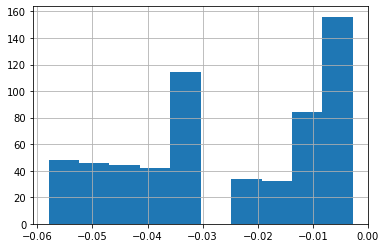

In [5]:
rel_diff = (df1 - df2)/df1
rel_diff.stack().stack().hist()

# Look if seasonality makes any difference

In [6]:
df1= pd.read_pickle(directory/CORR/'full_distance_matrix.pkl')
df2 = pd.read_pickle(directory/SEASON/'full_distance_matrix.pkl')
df2 = df2.loc[df1.index, df1.columns]
assert all(df1.index == df2.index) and all(df1.columns == df2.columns)

<AxesSubplot:>

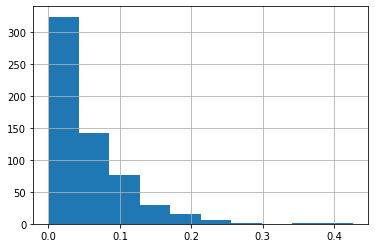

In [7]:
rel_diff = (df1 - df2).abs()/df1
rel_diff.stack().stack().hist()

# Check Correlation with Koen's answers

### First try (with data problems)

In [8]:
ResultParser('result_20210628_koen', SIMPLE).pearson_correlation_between_distances_and_queries()

reading the data... this can take a while (if remotely mounted)


0.45347496883413935

### Second try (data problems replaced by NaN)
This makes no difference but that is actually logical! Because days with a NaN were fully ignored

In [9]:
ResultParser('result_20210628_koen', SIMPLE_DATA).pearson_correlation_between_distances_and_queries()

reading the data... this can take a while (if remotely mounted)


0.45347496883413935

### With seasonality
Actually a slightly worse correlation

In [10]:
ResultParser('result_20210628_koen', SEASON).pearson_correlation_between_distances_and_queries()

reading the data... this can take a while (if remotely mounted)


0.4445395014679494

In [11]:
ResultParser('result_20210628_koen', SEASON).similarity_metric_histogram_chart()

reading the data... this can take a while (if remotely mounted)


alt.Chart(...)

In [12]:
ResultParser('result_20210628_koen', SEASON).similarity_metric_distribution_chart()

reading the data... this can take a while (if remotely mounted)


alt.Chart(...)